# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости и установить параметры влияющие на неё.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Рассмотрим общую информацию о датафрейме.

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В датафрейме 23699 строк. Многие столбцы имеют пропуски значений.

In [4]:
raw_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


По беглому осмотру можно сказать, что указанный тип данных для некоторых столбцов не соответствует типу данных их значений.

Рассмотрим числовые значения столбцов на гистограмме, установив для наглядности количество корзин в 40.

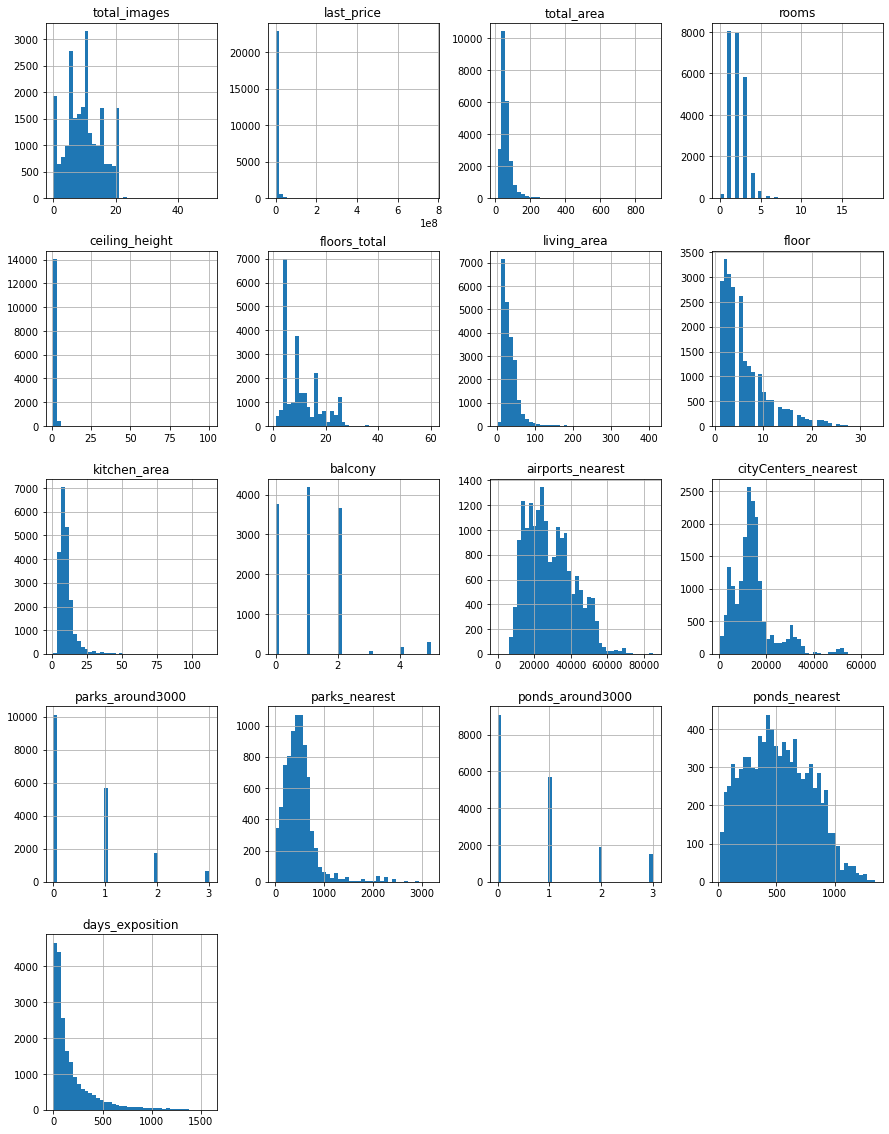

In [5]:
raw_data.hist(figsize=(15,20), bins=40);

<ol>
    <li>Гистограмма 'total_images' - значения от 0 до 20. Скорее всего 20 - техническое ограничение максимального количества изображений, которое может быть загружен на сайт. Имеет несколько выраженных пиков. Встречается часто как полное отсутствие так и наоборот максимальное заполнение по фото.</li>
    <li>Гистограмма 'last_price' - текущая визуализация не позволяет сделать выводы.</li>
    <li>Гистограмма 'total_area' - можно сказать, что большинство значений общей площади квартир до 200 кв. метров. Наиблоее поплуярные варианты около 50 кв. м.</li>
    <li>Гистограмма 'rooms' - популярный вариант квартир на 1 или 2 комнаты.</li>
    <li>Гистограмма 'ceiling_height' - текущая визуализация не позволяет сделать выводы.</li>
    <li>Гистограмма 'floors_total' - имеет несколько ярко выраженных пиков. Вероятно это связано с популярными вариантами типовой застройки.</li>
    <li>Гистограмма 'living_area' - больше всего объявлений предлагают квартиры с малой жилой площадью.</li>
    <li>Гистограмма 'floor' - самый распространенный вариант расположения квартиры с 1 по 5 этаж.</li>
    <li>Гистограмма 'kitchen_area' - основной диапазон значений площади кухни до 25 кв. м. Где самые популярные варианты примерно до 10 кв. м.</li>
    <li>Гистограмма 'balcony' - примерно равнозначно встречаются варианты квартир без балкона, либо с 1 или 2. Очень редкие квартиры могут иметь 3 и более балконов.</li>
    <li>Гистограмма 'airports_nearest' - график указывает, что ближайшие к аэропорту квартиры на удалении 5 км, но чаще всего это 20-25 км.</li>
    <li>Гистограмма 'cityCenters_nearest' - имеет довольно узкий пик на значении ~17 км. А так же пик на значении ~5 км. Это может говорить об опредленном районировании квартир из объявлений</li>
    <li>Гистограмма 'parks_around3000' - парки в пределах 3 км. чаще всего вовсе отсутствуют. Если парк и есть вблизи, то чаще всего 1.</li>
    <li>Гистограмма 'parks_nearest' - ожидаемо парки находятся в пешей доступности. Расстояние до них обычно в пределах 1000 метров от дома.</li>
    <li>Гистограмма 'ponds_around3000' - водоемы в пределах 3 км. чаще всего вовсе отсутствуют. Если водоем и есть вблизи, то чаще всего 1.</li>
    <li>Гистограмма 'ponds_nearest' - ожидаемо водоемы находятся в пешей доступности. Расстояние до них обычно в пределах 1000 метров от дома.</li>
    <li>Гистограмма 'days_exposition' - самые частые объявления на площадке как правило только что размещенные. Их количество убывает пропорционально количеству проведенных дней на размещении.</li>
</ol>

<b>Вывод по пункту 1.</b>  
Портрет размещаемых квартир чаще всего выглядит так: 1,2 - комнатная квартира с небольшой кухней до 10 кв. метров с 1 балконом или вовсе без него. Этажное расположение квартиры невысокое. Парки и водоемы рядом - не обязательный атрибут, который в большом количестве случаев отсутствует.  
При этом не смотря на частую встречаемость таких квартир площадка способна предложить и другие разнообразные варианты жил. площади в большом количестве.

### Предобработка данных

<h4>Заполнение пропущенных значений</h4>

Рассмотрим количество пропусков в датафрейме.

In [6]:
raw_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Во многих столбцах количество пропущенных значений составляет значительную долю от всех строк, соответственно избавиться от этих строк простым удалением мы не можем, т.к. это может существенно повлиять на выводы. Попробуем заполнить пропущенные значения исходя из логики пропусков.

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

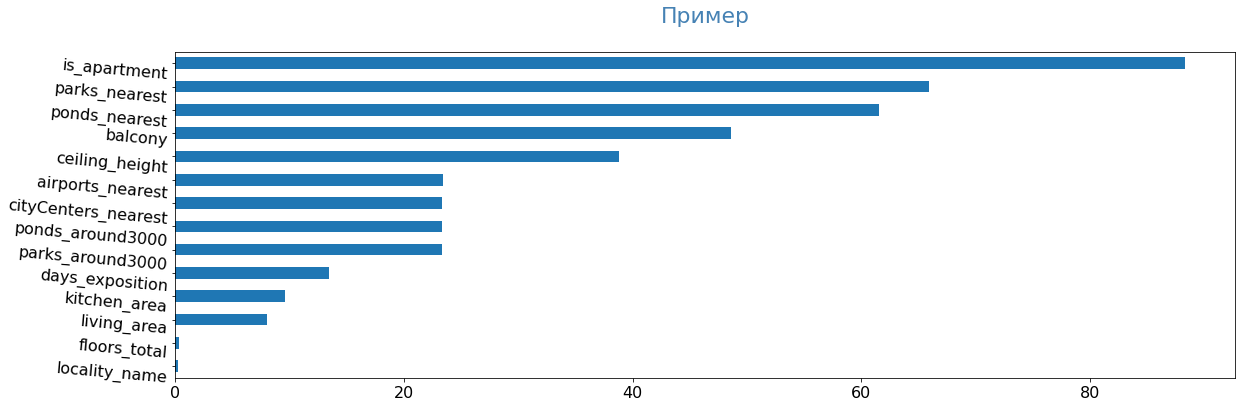

In [8]:
pass_value_barh(raw_data)

Прежде чем вносить изменения в наш датафрейм, создадим его копию.

In [9]:
data = raw_data.copy()

Рассмотрим столбцы, в которых мы сможем заменить пропущенных значения

1. Столбец ceiling_height - установить пропуски не представляется возможным, т.к. высота потолков может быть самая разная. Количество пропущенных значений составляет почти 50%, заполнив пропущенные значения средними или медианными показателями мы получим сильное смещение выборки.

2. Столбец floor_total - таких записей всего 86, их можно удалить не повлияв значительно на итоговый результат.

In [10]:
data = data[data['floors_total'].isna() != True]

3. Столбец living_area - рассчитаем медианное значение для каждого типа квартиры покомнатно и заменим пропуски. Но для этого рассмотрим какое количество квартир представлено в разрезе комнат, заодно сразу вычислим медианное жилой площади. Таким образом мы сможем отсеять маленькие выборки (меньше 30 квартир в одной).

In [11]:
median_living_area = data.pivot_table(index='rooms', values='living_area', aggfunc=['count', 'median', 'mean'])

#проверим результат
median_living_area

,count,median,mean
,living_area,living_area,living_area
rooms,,,
0,183,18.000,18.865246
1,7368,17.600,17.900308
2,7279,30.500,31.736574
3,5353,45.000,47.384711
4,1087,63.500,66.936136
5,292,91.785,100.009247
6,98,124.400,131.799796
7,53,145.000,163.564151


Выборка выглядит логично: чем больше комнат в квартире, тем больше жилая площадь и тем реже такие квартриры встречаются. Таблица позволяет увидеть, что стоит отсеять при замене пропусков квартиры, чье количество комнат больше 7.

Изменим получившиеся имена колонок на более читаемые

In [12]:
median_living_area.columns = ['flat_count', 'median_liv_ar', 'mean_liv_ar']

Заполним полученными значениями 'median_liv_ar' пропущенные значения 'living_area'

In [13]:
#тут должен быть цикл, но работа с циклами в пандасе у меня вызывает сложности :(

#студии
data[(data['rooms'] == 0) & (data['living_area'].isna())] = data.fillna({'living_area':median_living_area['median_liv_ar'][0]})
#1-комнатная
data[(data['rooms'] == 1) & (data['living_area'].isna())] = data.fillna({'living_area':median_living_area['median_liv_ar'][1]})
#2-комнатная
data[(data['rooms'] == 2) & (data['living_area'].isna())] = data.fillna({'living_area':median_living_area['median_liv_ar'][2]})
#3-комнатная
data[(data['rooms'] == 3) & (data['living_area'].isna())] = data.fillna({'living_area':median_living_area['median_liv_ar'][3]})
#4-комнатная
data[(data['rooms'] == 4) & (data['living_area'].isna())] = data.fillna({'living_area':median_living_area['median_liv_ar'][4]})
#5-комнатная
data[(data['rooms'] == 5) & (data['living_area'].isna())] = data.fillna({'living_area':median_living_area['median_liv_ar'][5]})
#6-комнатная
data[(data['rooms'] == 6) & (data['living_area'].isna())] = data.fillna({'living_area':median_living_area['median_liv_ar'][6]})
#7-комнатная
data[(data['rooms'] == 7) & (data['living_area'].isna())] = data.fillna({'living_area':median_living_area['median_liv_ar'][7]})

Проверим оставшиеся значения NaN.

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area                 1
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Осталась всего одна строка. Избавимся от нее методом dropna().

In [15]:
data.dropna(subset=['living_area'], inplace=True)

4. Столбец 'is_apartment' предполагает указание булева значения. Количество пропусков достигает 20838 значений. Рассмотрим уникальные данные данного столбца.

In [16]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Как и предполагалось столбец содержит булевы значения - False и True. Скорее всего NaN, это значения которые указывают, что квартира не является апартаментами. Логично, что апартаменты будут в меньшинстве по отношению к обычным квартирам. Поэтому заменим пропуски значением False.

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(False)

5. Столбец 'kitchen_area' - аналогично с жилой площадью, попробуем заменить пропуски медианным значением размера кухонь по каждой квартире в разрезе комнат.

In [18]:
#вычислим среднее и медианное значения площади кухни
median_kitchen_area = data.pivot_table(index='rooms', values='kitchen_area', aggfunc=['count', 'median', 'mean'])

#проверим результат
median_kitchen_area

,count,median,mean
,kitchen_area,kitchen_area,kitchen_area
rooms,,,
0,0,NaN,NaN
1,7203,9.00,9.548692
2,7270,8.70,9.974912
3,5369,9.50,11.293906
4,1080,11.05,13.663009
5,285,15.10,18.367649
6,96,19.75,21.098229
7,52,20.00,21.998077


In [19]:
#поправим имена столбцов
median_kitchen_area.columns = ['kitchens_count', 'median_kitch_ar', 'mean_kitch_ar']

Полученная сводная имеет полный пропуск значений площади кухни в квартирах-студиях. Из этого можно предположить, что из-за того
что кухня в них не отделена то и площадь не указывается. Заполним пропуски значением 0 для студий.

In [20]:
data[(data['rooms'] == 0) & (data['kitchen_area'].isna())] = data.fillna({'kitchen_area':0})

Оставшимся кухням присвоим медианные значения (до 7-комнатных квартир включительно т.к. ранее решили, что будем указывать медианное в пропусках, где выбора больше 30 значений).

In [21]:
#1-комнатная
data[(data['rooms'] == 1) & (data['kitchen_area'].isna())] = data.fillna({'kitchen_area':median_kitchen_area['median_kitch_ar'][1]})
#2-комнатная
data[(data['rooms'] == 2) & (data['kitchen_area'].isna())] = data.fillna({'kitchen_area':median_kitchen_area['median_kitch_ar'][2]})
#3-комнатная
data[(data['rooms'] == 3) & (data['kitchen_area'].isna())] = data.fillna({'kitchen_area':median_kitchen_area['median_kitch_ar'][3]})
#4-комнатная
data[(data['rooms'] == 4) & (data['kitchen_area'].isna())] = data.fillna({'kitchen_area':median_kitchen_area['median_kitch_ar'][4]})
#5-комнатная
data[(data['rooms'] == 5) & (data['kitchen_area'].isna())] = data.fillna({'kitchen_area':median_kitchen_area['median_kitch_ar'][5]})
#6-комнатная
data[(data['rooms'] == 6) & (data['kitchen_area'].isna())] = data.fillna({'kitchen_area':median_kitchen_area['median_kitch_ar'][6]})
#7-комнатная
data[(data['rooms'] == 7) & (data['kitchen_area'].isna())] = data.fillna({'kitchen_area':median_kitchen_area['median_kitch_ar'][7]})

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                3
balcony                 11479
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14551
days_exposition          3172
dtype: int64

В 'kitchen_area' осталось 3 пропущенных значения. Удалим их.

In [23]:
data.dropna(subset=['kitchen_area'], inplace=True)

Проверим заполненные пропуски на появления аномалий.

In [24]:
(data[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])]
    .pivot_table(index='rooms', values='total_area', aggfunc='count', margins=True)
)

,total_area
rooms,
0,7
1,358
2,226
3,239
4,67
5,24
6,10
7,1
All,932


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23609 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23609 non-null  int64  
 1   last_price            23609 non-null  float64
 2   total_area            23609 non-null  float64
 3   first_day_exposition  23609 non-null  object 
 4   rooms                 23609 non-null  int64  
 5   ceiling_height        14493 non-null  float64
 6   floors_total          23609 non-null  float64
 7   living_area           23609 non-null  float64
 8   floor                 23609 non-null  int64  
 9   is_apartment          23609 non-null  bool   
 10  studio                23609 non-null  bool   
 11  open_plan             23609 non-null  bool   
 12  kitchen_area          23609 non-null  float64
 13  balcony               12132 non-null  float64
 14  locality_name         23561 non-null  object 
 15  airports_nearest   

In [26]:
data = data[data['total_area']*0.9 > (data['living_area'] + data['kitchen_area'])].dropna(subset=['kitchen_area'])

6. Столбец 'balcony'. Количество пропущенных значений 11479. Рассмотрим уникальные значения столбца.

In [27]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Указаны корректные значения балконов. Пропуски скорее всего предполагают их отсутствие (интуиция подсказала, чес слово :) ). Заменим пропуски нулями.

In [28]:
data['balcony'] = data['balcony'].fillna(0)

7. Столбец 'locality_name'. 48 пропущенных значений. По косвенным географическим признакам можно попытаться установить к каким населенным пунктам относится та или иная квартира. Но т.к. задача трудоемкая, а таких значений немного, то проще от них избавиться. Это не должно повлиять на картину данных в целом.

In [29]:
data.dropna(subset=['locality_name'], inplace=True)

Осталась группа столбцов с указанием ближайших аэропортов, центров, парков и водоемов. Рассмотрим их по отдельности.

8. Столбец 'airports_nearest'. Выведем распределение данных по населенным пунктам.

In [30]:
#заполненные данные по ближайшим аэропортам
data[~data['airports_nearest'].isna()].groupby('locality_name')['airports_nearest'].count()

locality_name
Зеленогорск                   24
Колпино                      328
Красное Село                 168
Кронштадт                     92
Ломоносов                    128
Павловск                      37
Петергоф                     196
Пушкин                       359
Санкт-Петербург            15019
Сестрорецк                   178
поселок Лисий Нос              1
посёлок Александровская        2
посёлок Белоостров             1
посёлок Лисий Нос              2
посёлок Металлострой          66
посёлок Молодёжное             5
посёлок Парголово            321
посёлок Песочный               4
посёлок Петро-Славянка         1
посёлок Понтонный             20
посёлок Репино                 3
посёлок Сапёрный               6
посёлок Стрельна              42
посёлок Усть-Ижора             1
посёлок Шушары               426
Name: airports_nearest, dtype: int64

Данные указаны лишь для небольшой горстки населений. Я погуглил и оказалось, что указанные административные единицы являются частью города Санкт-Петербург.

In [31]:
#заполненные данные по ближайшим городским центрам
data[~data['cityCenters_nearest'].isna()].groupby('locality_name')['cityCenters_nearest'].count()

locality_name
Зеленогорск                   24
Колпино                      328
Красное Село                 168
Кронштадт                     92
Ломоносов                    128
Павловск                      37
Петергоф                     196
Пушкин                       358
Санкт-Петербург            15043
Сестрорецк                   178
поселок Лисий Нос              1
посёлок Александровская        2
посёлок Белоостров             1
посёлок Лисий Нос              2
посёлок Металлострой          66
посёлок Молодёжное             5
посёлок Парголово            321
посёлок Песочный               4
посёлок Петро-Славянка         1
посёлок Понтонный             20
посёлок Репино                 3
посёлок Сапёрный               6
посёлок Стрельна              42
посёлок Усть-Ижора             1
посёлок Шушары               426
Name: cityCenters_nearest, dtype: int64

Ситуация повторяется. Данные указаны для СПб и прандлежащими ему муниципальным образованиями.  Можно ли из этого сделать вывод, что данная информация указана только для них. Проверим оставшиеся столбцы для подтверждения выводов.

In [32]:
#заполненные данные по ближайшим паркам
data[~data['parks_around3000'].isna()].groupby('locality_name')['parks_around3000'].count()

locality_name
Зеленогорск                   24
Колпино                      328
Красное Село                 168
Кронштадт                     92
Ломоносов                    128
Павловск                      37
Петергоф                     196
Пушкин                       359
Санкт-Петербург            15043
Сестрорецк                   178
поселок Лисий Нос              1
посёлок Александровская        2
посёлок Белоостров             1
посёлок Лисий Нос              2
посёлок Металлострой          66
посёлок Молодёжное             5
посёлок Парголово            321
посёлок Песочный               4
посёлок Петро-Славянка         1
посёлок Понтонный             20
посёлок Репино                 3
посёлок Сапёрный               6
посёлок Стрельна              42
посёлок Усть-Ижора             1
посёлок Шушары               426
Name: parks_around3000, dtype: int64

In [33]:
#заполненные данные по ближайшим паркам
data[~data['parks_nearest'].isna()].groupby('locality_name')['parks_nearest'].count()

locality_name
Зеленогорск            16
Колпино               131
Красное Село           42
Кронштадт              84
Ломоносов              15
Павловск               25
Петергоф              141
Пушкин                209
Санкт-Петербург      6985
Сестрорецк             72
посёлок Парголово      10
посёлок Стрельна       19
Name: parks_nearest, dtype: int64

Снова данные указаны для СПб и его пригорода.

In [34]:
#заполненные данные по водоемам в пределах 3 км
data[~data['ponds_around3000'].isna()].groupby('locality_name')['ponds_around3000'].count()

locality_name
Зеленогорск                   24
Колпино                      328
Красное Село                 168
Кронштадт                     92
Ломоносов                    128
Павловск                      37
Петергоф                     196
Пушкин                       359
Санкт-Петербург            15043
Сестрорецк                   178
поселок Лисий Нос              1
посёлок Александровская        2
посёлок Белоостров             1
посёлок Лисий Нос              2
посёлок Металлострой          66
посёлок Молодёжное             5
посёлок Парголово            321
посёлок Песочный               4
посёлок Петро-Славянка         1
посёлок Понтонный             20
посёлок Репино                 3
посёлок Сапёрный               6
посёлок Стрельна              42
посёлок Усть-Ижора             1
посёлок Шушары               426
Name: ponds_around3000, dtype: int64

In [35]:
#заполненные данные ближайшим водоемам
data[~data['ponds_nearest'].isna()].groupby('locality_name')['ponds_nearest'].count()

locality_name
Зеленогорск                  18
Колпино                     187
Красное Село                 10
Кронштадт                    84
Ломоносов                    81
Павловск                     33
Петергоф                    115
Пушкин                      175
Санкт-Петербург            7638
Сестрорецк                  132
посёлок Александровская       2
посёлок Белоостров            1
посёлок Парголово            54
посёлок Петро-Славянка        1
посёлок Понтонный             7
посёлок Сапёрный              6
посёлок Стрельна             23
посёлок Шушары              148
Name: ponds_nearest, dtype: int64

Всё верно. Информация об инфраструктуре относится только к СПб.

<b>Вывод по этапу 2.1</b>
Большинство пропусков в данных, которые указывает пользователь мы заполнили, либо удалили, где это было возможно. 
Заполнить столбцы с иформацией об инфраструктуре административных субъектов не относящихся к СПб и его МО не представляется возможным, поскольку для этого нет даже косвенных данных.  

Заполнение пропусков 'days exposition' также не представляется возможным, т.к. скорее всего они указывают на то, что объявление не снималось с публикации, а значит квартиры не были проданы. Указать '0' будет приводить в неверным вычислениям и указывать на то, что большое количество квартир было продано в день публикации объявлений (что безусловно здорово, но нереально).

Удалять такие строки нельзя, их много, это только снизит качество качество данных

<h4>Преобразование типов данных</h4>

Для наглядности составим соответствие типов столбцов и их данных, которые требуется преобразовать.  

1. first_day_exposition - timedata
2. floors_total - int64
3. is_apartment - bool 
4. balcony - int64

Остальные колонки останутся без изменений поскольку в них остались значения NaN.

In [36]:
#преобразуем first_day_exposition в timedata, отбросив время (поскольку оно везде 00:00).
#В дальнейшем это нам поможет обрабатывать даты.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [37]:
#преобразуем floors_total в int64, т.к. значения данного столбца могут быть только целыми числами.
data['floors_total'] = data['floors_total'].astype('int64')

In [38]:
#преобразуем is_apartment в bool, т.к. значения данного столбца одно из двух True или False
data['is_apartment'] = data['is_apartment'].astype('bool')

In [39]:
#преобразуем balcony в int64, т.к. значения данного столбца могут быть только целыми числами.
data['balcony'] = data['balcony'].astype('int64')

In [40]:
#преобразуем last_price в int64, т.к. значения данного столбца только целые числа.
data['last_price'] = data['last_price'].astype('int64')

In [41]:
#проверим, сменился ли тип
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22632 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22632 non-null  int64         
 1   last_price            22632 non-null  int64         
 2   total_area            22632 non-null  float64       
 3   first_day_exposition  22632 non-null  datetime64[ns]
 4   rooms                 22632 non-null  int64         
 5   ceiling_height        13982 non-null  float64       
 6   floors_total          22632 non-null  int64         
 7   living_area           22632 non-null  float64       
 8   floor                 22632 non-null  int64         
 9   is_apartment          22632 non-null  bool          
 10  studio                22632 non-null  bool          
 11  open_plan             22632 non-null  bool          
 12  kitchen_area          22632 non-null  float64       
 13  balcony         

<b>Вывод по пункту 2.2</b>  
Указанное нами преобразование сработало должным образом.

<h4>Поиск дублей</h4>

Попытаемся сосчитать полные дубли строк в нашем датафрейме.

In [42]:
data.duplicated().sum()

0

Количество полностью повторяемых строк - 0. А что по столбцам?
В числовых и булевых значениях колонок повторение показателей норма, но что тогда по строковым значениям столбца 'locality_name'? Проверим написание.

In [43]:
data.sort_values(by='locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Визуальный осмотр быстро позволяет понять, что подход к указанию территориального расположения разный: административные единицы могут быть вовсе не указаны, слово "поселок" подвергается разному написанию через е или ё.  
Даже беглый осмотр в Гугле разницы между поселком и селом указывает, скорее на их культурную разницу, чем юридическую. Попробуем избавиться от этих приставок, оставив только имена.  
Существует вероятность того, что город и поселок могут носить одно имя, как например в случае с Парижем: это столица Франции и поселок в Челябинской области. Однако, мы рассматриваем объявления Ленинградской области, предполагаю, что вероятность такой ошибки минимальна.

Скопируем столбец с именами, назвав его 'new_locality_name'.

In [44]:
data['new_locality_name'] = data['locality_name']

Изменим данные в следующем порядке:  
1. Заменим все ё на е
2. Удалим административные обозначения

In [45]:
#подменяем 'ё'
data['new_locality_name'] = data['new_locality_name'].str.replace('ё', 'е', case=True)

In [46]:
# #подменяем 'городской поселок ' (не забываем указать пробел)
data['new_locality_name'] = data['new_locality_name'].str.replace('городской поселок ', '', case=True)

# #подменяем 'поселок городского типа имени '
data['new_locality_name'] = data['new_locality_name'].str.replace('поселок городского типа имени', 'ПГТ имени ', case=True)

# #подменяем 'поселок городского типа '
data['new_locality_name'] = data['new_locality_name'].str.replace('поселок городского типа ', '', case=True)

# #подменяем 'поселок при железнодорожной станции '
data['new_locality_name'] = data['new_locality_name'].str.replace('поселок при железнодорожной станции ', '', case=True)

# #подменяем 'садоводческое некоммерческое товарищество '
data['new_locality_name'] = data['new_locality_name'].str.replace('садоводческое некоммерческое товарищество ', '', case=True)

# #подменяем 'садовое товарищество '
data['new_locality_name'] = data['new_locality_name'].str.replace('садовое товарищество ', '', case=True)

# #подменяем 'коттеджный поселок '
data['new_locality_name'] = data['new_locality_name'].str.replace('коттеджный поселок ', '', case=True)

# #подменяем 'коттеджный поселок '
data['new_locality_name'] = data['new_locality_name'].str.replace('коттеджный поселок ', '', case=True)

# #подменяем 'поселок '
data['new_locality_name'] = data['new_locality_name'].str.replace('поселок ', '', case=True)

# #подменяем 'деревня '
data['new_locality_name'] = data['new_locality_name'].str.replace('деревня ', '', case=True)

# #подменяем 'село '
data['new_locality_name'] = data['new_locality_name'].str.replace('село ', '', case=True)

#подменяем 'станции '
data['new_locality_name'] = data['new_locality_name'].str.replace('станции ', '', case=True)

In [47]:
data.sort_values(by='new_locality_name')['new_locality_name'].unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вещево', 'Виллози',
       'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичево', 'И

Проверим, появились ли дубли.

In [48]:
#удалим старый столбец 'locality_name' и сосчитаем количество дублей
data.drop(columns=['locality_name'], axis=1).duplicated().sum()

0

<b>Вывод по пункту 2.3</b>  
Дублирующиеся строки не обнаружены. Дубли в столбце 'locality_name' обработаны.

In [49]:
# check
data['new_locality_name'].nunique()

299

<h4>Поиск аномальных значений</h4>

Удобный способ обнаружения выброса - построение диаграммы boxplot ("ящик с усами") на основе числовых данных.  
Рассмотрим следующие столбцы на выбросы:  
1. total_images  
2. last_price  
3. total_area  
4. rooms 
5. ceiling_height  
6. floors_total  
7. living_area  
8. floor  
9. kitchen_area  
11. airports_nearest  
12. cityCenters_nearest   
14. parks_nearest  
16. ponds_nearest  

<AxesSubplot:>

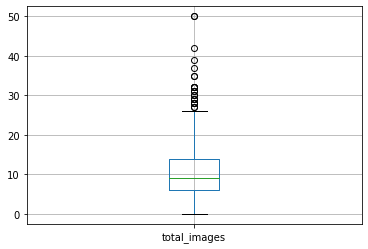

In [50]:
data.boxplot(column='total_images')

Согласно вычислениям, выбросами считаются значения превышающие верхнюю границу в 26 изображений. Судя по плотности точек, таковых значений немного. Отсеем их из столбца total_images.

In [51]:
#убираем значения
data = data.query('total_images < 27')

<AxesSubplot:>

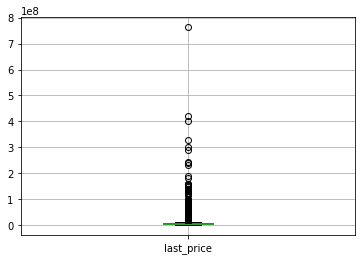

In [52]:
#boxplot для last_price
data.boxplot(column='last_price')

Одно из значений значительное превышает ценовое предложение на фоне остальных, есть так же островки аутсайдеров превышающие стоимость квартиры более 200 миллионов рублей. Каково их количество?

In [53]:
data.query('last_price > 200000000')['last_price'].count()

9

Всего 6 значений портят нам картину однородности. Избавимся от выбросов.

In [54]:
#оставляем значения менее 200 миллионов.
data = data.query('last_price < 200000000')

Проверим новое распределение

<AxesSubplot:>

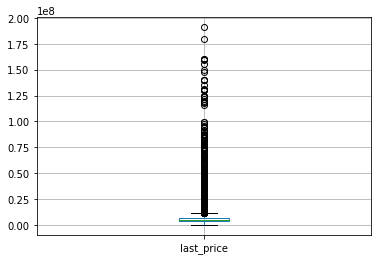

In [55]:
data.boxplot(column='last_price')

Остаются пробелы в распределении. Рассмотрим значения, которые превышают 100 миллионов.

In [56]:
data.query('last_price > 100000000')['last_price'].count()

26

Количество невелико, избавимся от них.

In [57]:
#оставляем значения менее 100 миллионов.
data = data.query('last_price < 100000000')

<AxesSubplot:>

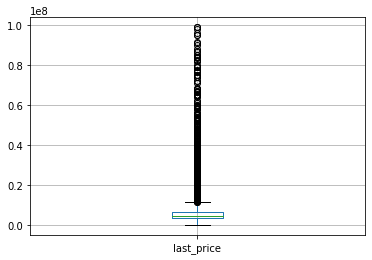

In [58]:
data[data['last_price'] < 200000000].boxplot(column='last_price')

Распределение стало более однородным. Сочтем это достаточным условиям.

<AxesSubplot:>

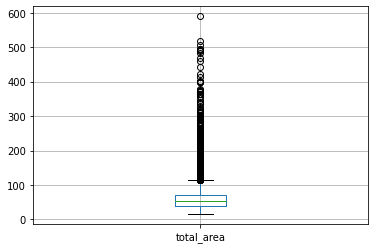

In [59]:
data.boxplot(column=['total_area'])

Не смотря на кажущееся большое количество выбросов гистограмма показывает довольно равномерное убывание частоты с увеличением площади.Высокое скопление точек за Q4 тоже вызывает сомнение в том, что это можно восрпинимать как выброс. Внимание привлекает лишь несколько точек, где площадь превышает 500 кв. метров. Рассмотрим их.

In [60]:
# check
import matplotlib.pyplot as plt

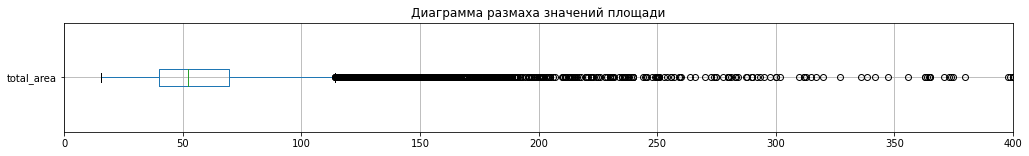

In [61]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

In [62]:
data.query('total_area > 500')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name
4237,1,50000000,517.0,2017-10-14,7,NaN,4,332.0,3,False,...,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN,Санкт-Петербург
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,Санкт-Петербург
8018,20,84000000,507.0,2015-12-17,5,4.45,7,301.5,7,True,...,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0,Санкт-Петербург


Таких квартир всего три, они имеют большое количество комнат, что косвенно указывает на то, что они вполне могут быть реальны. Но мы можем избавиться от них, т.к. их немного, а их удаление поможет повысить однородность выборки.

In [63]:
#отсеим строки, чье значение total_area превышает 500 кв. м.
data = data.query('total_area <= 500')

Перейдем к обработке 'rooms'

<AxesSubplot:>

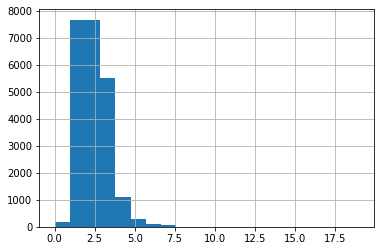

In [64]:
data['rooms'].hist(bins=20)

<AxesSubplot:>

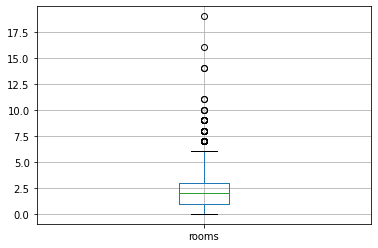

In [65]:
data.boxplot(column='rooms')

Прежде чем удалять выбросы, рассмотрим, как распределилось количество комант в числах. Их набор довольно ограничен, поэтому достаточно будет value_counts.

In [66]:
data['rooms'].value_counts()

2     7668
1     7646
3     5522
4     1092
5      290
0      187
6       89
7       52
8        8
9        7
10       3
11       2
14       2
16       1
19       1
Name: rooms, dtype: int64

Мы видим, что начиная с 8-комнатности, частоста встречаемости таких квартир меньше десятка. Думаю, что мы моем безболезненно от них избавиться, улучшив общую однородность выборки.

In [67]:
#оставим только те записи, в которых комнат меньше 8
data = data.query('rooms < 8')

Переходим к столбцу ceiling_height

<AxesSubplot:>

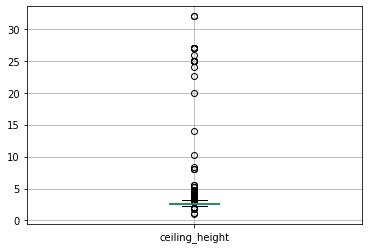

In [68]:
data.boxplot(column='ceiling_height')

Из графика мало что можно понять, однако высота потолков одной из квартир в 100 метров впечатляет! Исключим выброс.

In [69]:
#оставим только те записи, в которых значения менее высоты потолков менее 100, не забываем проверить NaN, чтобы не удалить эти строки
data = data.query('ceiling_height < 100 or ceiling_height.isna()')

<AxesSubplot:>

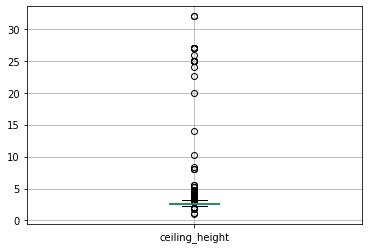

In [70]:
#посмотрим на распределение выбросов после удаления аномального значения
data.boxplot(column='ceiling_height')

Мы по прожнему видим множество выбросов, в которых высота потолков очень высока. Примерно, начиная с высоты 20 м., мы можем предположить, что это ошибочно указанная высота и здесь недостает точки в значении. Поделим эти значения на 10, приведя их в норму.

In [71]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

<AxesSubplot:>

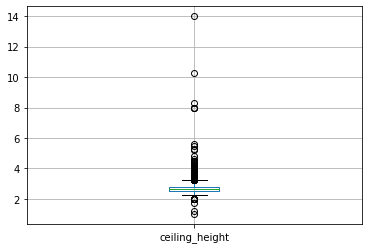

In [72]:
#посмотрим на распределение выбросов после удаления нормализации
data.boxplot(column='ceiling_height')

Уже лучше! Плотность точек выбросов до 6 метров наталкивает на мысль, что это всё же встречаемые явления. Они не обособленны, а тянутся хвостом.  
Здесь же видно очень малые значения высоты - менее 2 метров. Не уверен, чтобы Бильбо освоился в Ленинградской области. При этом, сложно сказать что это чья-то опечатка. Поскольку сдвинув точку вправо, мы получим уже значения высоты превышающее 10 метров. Всё же, стоит отказаться от этих значений.

In [73]:
#оставим значения не превышающие 7 метров и не ниже 2-х. И NaN, конечно
data = data.query('(2 < ceiling_height < 7) or ceiling_height.isna()')

<AxesSubplot:>

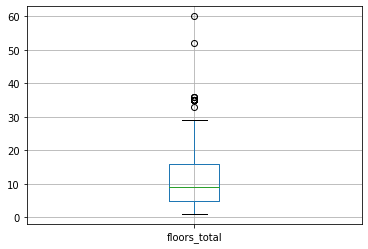

In [74]:
#boxplot этажности дома
data.boxplot(column='floors_total')

Имеется определенная доля, не входящая в интервал ящика. Однако, подобную высоту этажность домов можно допустить. Оставим без изменений.

<AxesSubplot:>

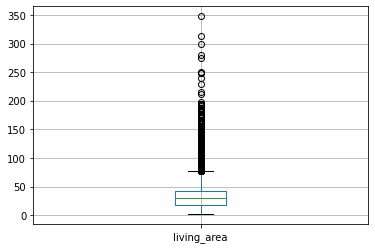

In [75]:
#boxplot жилой площади
data.boxplot(column='living_area')

Высокая плотность выбросов и отсутствие далеко отстоящих точек вызывают доверие к данным. Оставим как есть.

<AxesSubplot:>

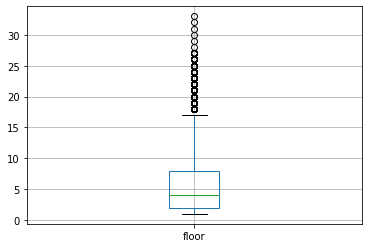

In [76]:
#boxplot этажа квартиры
data.boxplot(column='floor')

Помним, что этажность наших домов доходит до 60. Тут всё в пределах нормы.

<AxesSubplot:>

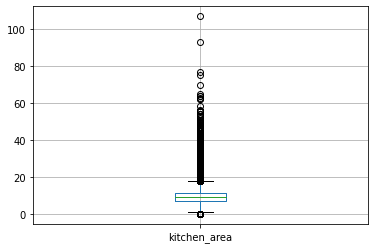

In [77]:
#boxplot kitchen_area
data.boxplot(column='kitchen_area')

Высокая плотность выбросов и отсутствие далеко отстоящих точек вызывают доверие к данным. Оставим как есть. Значения 0 - относятся к студиям.

<AxesSubplot:>

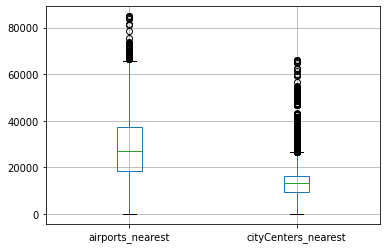

In [78]:
#boxplot для ближайших объектов, т.к. данные более-менее схожи, то можно построить ящик сразу для нескольких колонок.
data.boxplot(column=['airports_nearest', 'cityCenters_nearest'])

<AxesSubplot:>

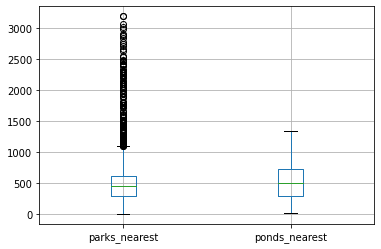

In [79]:
#boxplot для parks_nearest и ponds_nearest
data.boxplot(column=['parks_nearest', 'ponds_nearest'])

В графиках заметны различия. Парки имеет гораздо больших размах значений, в отличие от расположения водоемов. Однако выбросы похожи на ествественный хвост. Поэтому оставим как есть.

<AxesSubplot:>

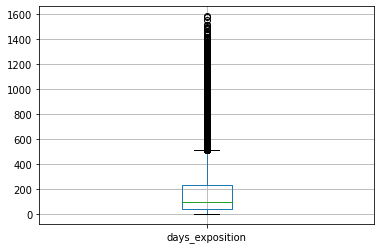

In [80]:
data.boxplot(column=['days_exposition'])

Высокая плотность значений выбросов, нет выделяющихся точек. Всё вполне естественно.

<b>Вывод по пункту 2.4</b>  
Основные отклоняющиеся значения мы обнаружили в столбцах 'last_price', 'total_area' и 'ceiling_height'. При этом в total_area, last_price значения могут быть вполнее естественными. Нет прямых доказательств, указывающих на их невозможность.  
В ceiling_height нам попался ряд значений, которые явно были неестественными. Это потолки с высотой в десятки метров, либо наоборот, ниже 2 метров. Очевидно, что это неестественные значения, от них мы избавились.

Снизив количество выбросов в столбцах мы улучшили однородность показателей. А обработка аномальных значений в ceiling_height, помогло повысить качество наших данных.

##### check gap

In [81]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22527 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22527 non-null  int64         
 1   last_price            22527 non-null  int64         
 2   total_area            22527 non-null  float64       
 3   first_day_exposition  22527 non-null  datetime64[ns]
 4   rooms                 22527 non-null  int64         
 5   ceiling_height        13914 non-null  float64       
 6   floors_total          22527 non-null  int64         
 7   living_area           22527 non-null  float64       
 8   floor                 22527 non-null  int64         
 9   is_apartment          22527 non-null  bool          
 10  studio                22527 non-null  bool          
 11  open_plan             22527 non-null  bool          
 12  kitchen_area          22527 non-null  float64       
 13  balcony         

In [82]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,527.00","22,527.00","13,914.00","19,485.00","22,527.00","22,527.00","22,527.00","22,527.00","22,527.00"
min,0.00,15.50,2.25,1.00,"12,190.00",2.00,0.00,1.00,1.00
max,7.00,495.00,5.60,"1,580.00","99,000,000.00",347.50,107.00,33.00,60.00


In [83]:
# check
data.rooms.value_counts().to_frame()

,rooms
2,7663
1,7636
3,5518
4,1092
5,290
0,187
6,89
7,52


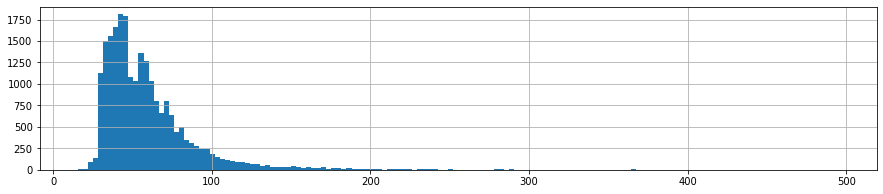

In [84]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />т.е. все квартиры более 250-ти квадратных метров можно считать редкостями
        
особенно это заметно на втором графике, где мы подробно рассматриваем промежуток от 180 кв. метров до 500

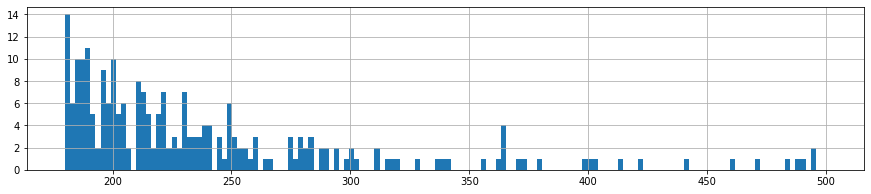

In [85]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

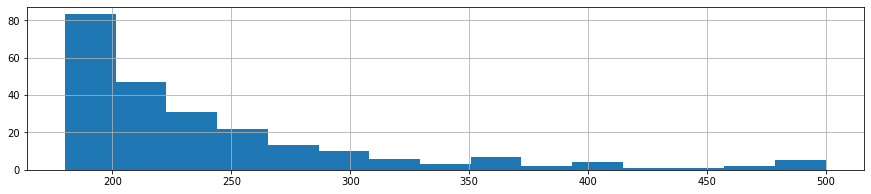

In [86]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

In [87]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,22.00,2.40,3.00,"585,156.00",10.00,0.00,1.00,2.00
0.01,1.00,28.00,2.50,4.00,"1,050,000.00",13.10,4.00,1.00,2.00
0.5,2.00,52.00,2.65,97.00,"4,650,000.00",30.00,9.00,4.00,9.00
0.99,5.00,181.25,3.70,"1,071.16","32,804,616.24",105.22,32.00,23.00,26.00
0.9988,7.00,316.94,4.32,"1,371.10","75,000,000.00",180.00,50.98,26.00,32.88


Отфильтруем значения более 250 кв. метров

In [88]:
#подсчет строк
data.query('total_area > 250')['total_area'].count()

68

In [89]:
#фильтрация редких значений total_area
data = data.query('total_area <= 250')

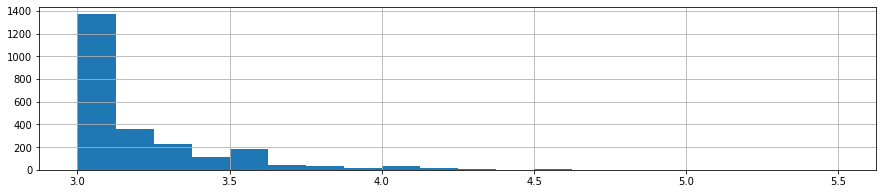

In [90]:
data['ceiling_height'].hist(bins=20, figsize = (15,3), range=(3,5.5));

Зачения после 4.5 очень редки.

In [91]:
#подсчет строк
data.query('ceiling_height > 4.5')['ceiling_height'].count()

3

Всего 3 строки. Можем от них избавиться.

In [92]:
#фильтрация редких значений ceiling_height, не забываем про NaN
data = data.query('ceiling_height <= 4.5 or ceiling_height.isna()')

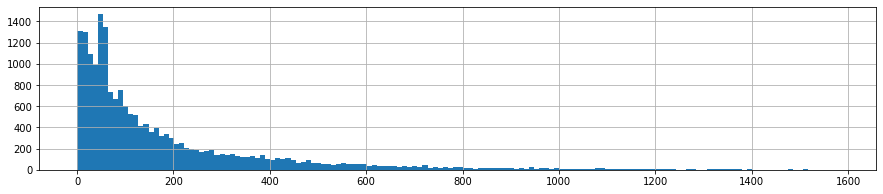

In [93]:
data['days_exposition'].hist(bins=150, figsize = (15,3));

Столбец days_exposition имеет очень длинный хвост. Согласно таблице квантилей, 99% значений лежат ниже значения 1,071.16 (значение сместилось в таблице после очистки). Возьмем эту точку за максимально значение и отсечем всё что находится выше как редкость. 

In [94]:
#фильтруем days_exposition
data = data.query('(days_exposition < 1072) or days_exposition.isna()')

В приведенной таблице выше (с максимальными и минимальными значениями) обнуружена аномально низкая стоимость квартир. Рассмотрим подробнее цены на гистограмме.

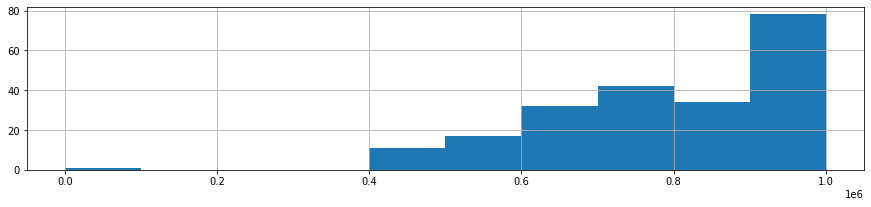

In [95]:
data['last_price'].hist(bins=10, figsize = (15,3), range=(0, 1000000));

По графику видно, что стоимость квартир начинается от 400 тыс. р. Но какое то аномальное значений выпадает. Избавимся от него.

In [96]:
#фильтрация last_price
data = data.query('last_price >= 400000')

Рассмотрим максимальные значения

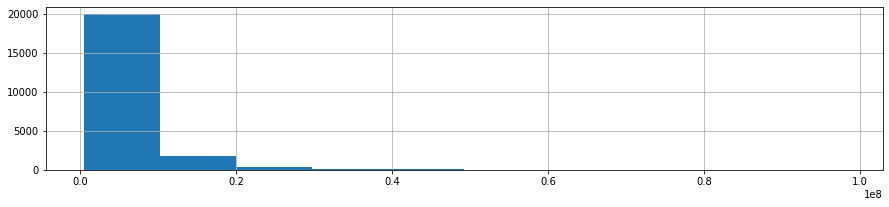

In [97]:
data['last_price'].hist(bins=10, figsize = (15,3));

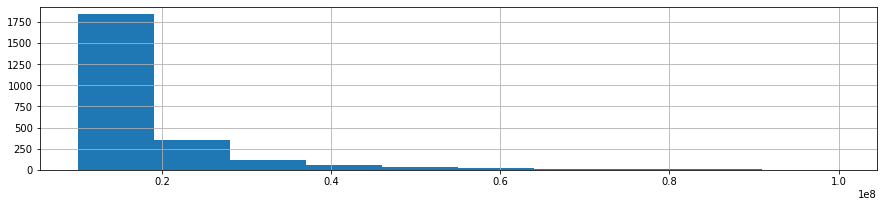

In [98]:
data['last_price'].hist(bins=10, figsize = (15,3), range=(10000000,100000000));

После полумиллиона значения становяться совсемм редки. Избавимся от них.

In [99]:
#фильтрация last_price
data = data.query('last_price <= 50000000')

<AxesSubplot:>

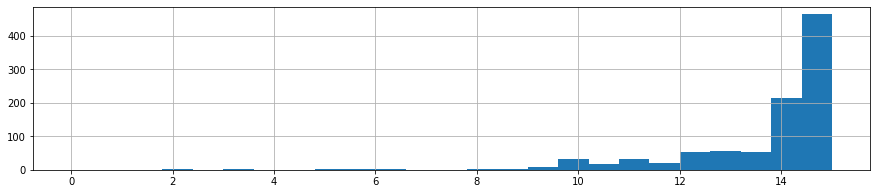

In [100]:
data['living_area'].hist(bins=25, figsize = (15,3), range=(0,15))

Видно редкие отдаленные значения, которые менее 8 кв. м. жилой площади.

<AxesSubplot:>

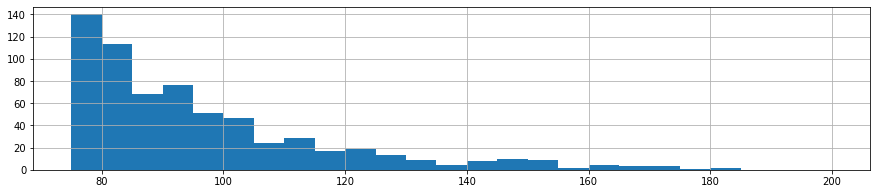

In [101]:
data['living_area'].hist(bins=25, figsize = (15,3), range=(75,200))

Значения более 155 кв. м. попадаются реже всех.

In [102]:
#фильтрация living_area
data = data.query(' 8 <= living_area <= 155')

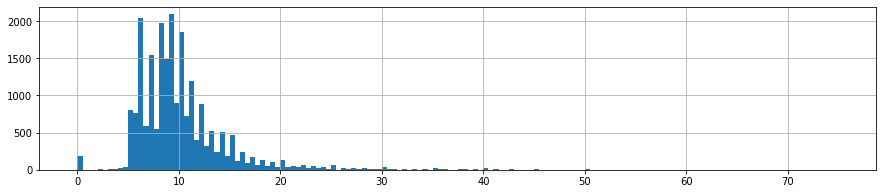

In [103]:
data['kitchen_area'].hist(bins=150, figsize = (15,3));

Имеют частые нулевые значения 30 значения встречаются значительно реже.

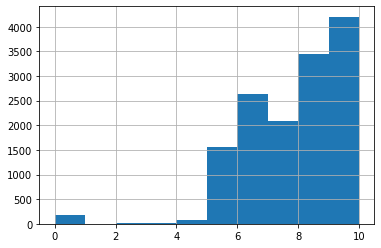

In [104]:
data['kitchen_area'].hist(bins=10, range=(0,10));

Не уверен, что мы можем отсеять нулевые значения. Т.к. квартиры с нулевыми показателями представляют одельную категорию квартир-студий, которую нужно учитывать в общей массе. Поэтому отсеем только премежуточные значения.

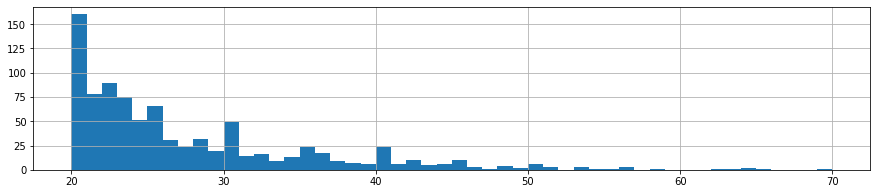

In [105]:
data['kitchen_area'].hist(bins=50, figsize = (15,3), range=(20,70));

Почти не встречаются после 45

In [106]:
#фильтрация kitchen_area
data = data.query('kitchen_area < 45')

##### check kitchen

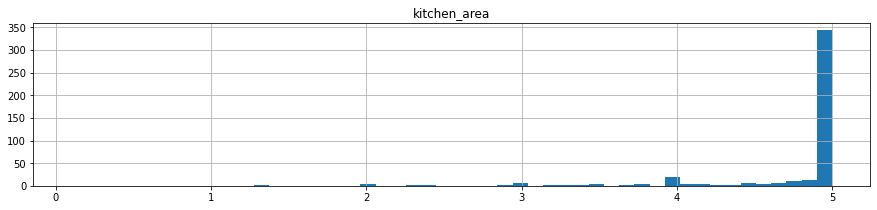

In [107]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0.1,5));

In [108]:
#фильтрация kitchen_aread
data = data.query('(kitchen_area == 0) or (kitchen_area > 5)')

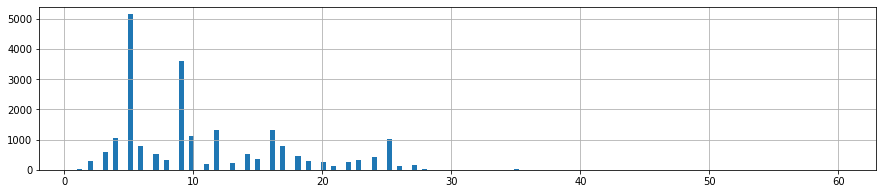

In [109]:
data['floors_total'].hist(bins=150, figsize = (15,3));

Практически не встречаются значения после 30.

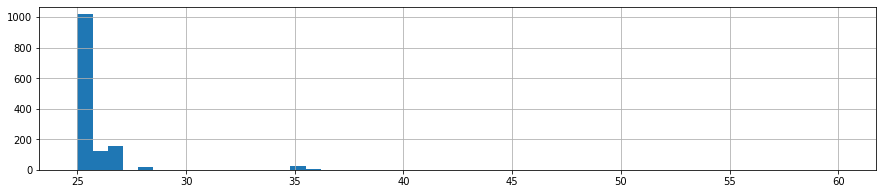

In [110]:
data['floors_total'].hist(bins=50, figsize = (15,3), range=(25,60));

In [111]:
data = data.query('floors_total < 30')

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21675 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21675 non-null  int64         
 1   last_price            21675 non-null  int64         
 2   total_area            21675 non-null  float64       
 3   first_day_exposition  21675 non-null  datetime64[ns]
 4   rooms                 21675 non-null  int64         
 5   ceiling_height        13367 non-null  float64       
 6   floors_total          21675 non-null  int64         
 7   living_area           21675 non-null  float64       
 8   floor                 21675 non-null  int64         
 9   is_apartment          21675 non-null  bool          
 10  studio                21675 non-null  bool          
 11  open_plan             21675 non-null  bool          
 12  kitchen_area          21675 non-null  float64       
 13  balcony         

Процент потерь записей ~8.2%

### Посчитаем и добавим в таблицу новые столбцы

После того как мы провели манипуляции со строки осталось обновить индексы поскольку мы нарушили их порядок.

In [113]:
#укажем в каком датафрейме заменить индексы, указав заодно параметр drop, для сброса старой индексации.
data.reset_index(inplace=True, drop=True)

<h4>Цена одного квадратного метра</h4>

Добавим в общую таблицу новый столбец с ценой квадратного метра.

In [114]:
#разделим ценовое предложение на общую площадь, округлив стоимость до целых и преобразуем столбец в int64
data['sqr_mtr_cost'] = round(data['last_price'] / data['total_area']).astype('int64')

<h4>День публикации объявления</h4>

Для работы с датами мы ранее преобразовали столбец 'first_day_exposition' в datetime64 для удобной обработки. Воспользуемся этим. Присвоить день недели применив метод day_name() к типу Series не выйдет, т.к. принимаемый тип данных Timestamp.  

In [115]:
#функци позволит определить необходимую категорию по условию
def which_day(day):
    if day.day_name() == 'Sunday':
        return 6
    elif day.day_name() == 'Monday':
        return 0
    elif day.day_name() == 'Tuesday':
        return 1
    elif day.day_name() == 'Wednesday':
        return 2
    elif day.day_name() == 'Thursday':
        return 3
    elif day.day_name() == 'Friday':
        return 4
    elif day.day_name() == 'Saturday':
        return 5

In [116]:
#воспользуемся apply и добавим получившиеся значения в таблицу
data['day_of_week_exp'] = data['first_day_exposition'].apply(which_day)

<h4>Месяц публикации объявления</h4>

Повторим шаг, только уже по отношению к месяцу

In [117]:
#функция, вычисляющая месяц
def which_month(month):
    if month.month_name() == 'January':
        return 1
    if month.month_name() == 'February':
        return 2
    if month.month_name() == 'March':
        return 3
    if month.month_name() == 'April':
        return 4
    if month.month_name() == 'May':
        return 5
    if month.month_name() == 'June':
        return 6
    if month.month_name() == 'July':
        return 7
    if month.month_name() == 'August':
        return 8
    if month.month_name() == 'September':
        return 9
    if month.month_name() == 'October':
        return 10
    if month.month_name() == 'November':
        return 11
    if month.month_name() == 'December':
        return 12

In [118]:
#укажем месяц для каждого значения
data['month_exposition'] = data['first_day_exposition'].apply(which_month)

<h4>Год публикации объявления</h4>

Теперь укажем год.

In [119]:
#воспользуемся методом .dt.year для извлечения года и записи в столбец year_exposition
data['year_exposition'] = data.loc[:, 'first_day_exposition'].dt.year

<h4>Тип этажа квартиры</h4>

Установим тип этажа. Значения должны быть следующими:
1. первый  
2. последний  
3. другой  

In [120]:
#тип 'первый'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'

In [121]:
#тип 'последний'
data.loc[(data['floor'] == data['floors_total'])&(data['floors_total'] != 1), 'floor_type'] = 'последний'

In [122]:
#тип 'другой'
data.loc[(data['floor'] != data['floors_total'])&(data['floor'] != 1), 'floor_type'] = 'другой'

<h4>Расстояние до центра города в километрах</h4>

Данные по расстоянию у нас представлены в столбце 'cityCenters_nearest' в метрах. Преобразуем их в километры, получившиеся значений запишем в новый столбец.

In [123]:
#получим километры разделив cityCenters_nearest на 1000, округлив значения до десятых.
#думаю десятки метров в оценке расстояния до центра большой роли не сыграют, а воспринимать информацию станет удобней.

data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 0)

<b>Вывод по пункту 3</b>  
  
Для дальнейшего исследовательского анализа данных мы получили производные столбцы, облегчающие понимание данных.  
  
Получили новые количественные переменные: sqr_mtr_cost, cityCenters_nearest_km  
Получили категориальные переменные: day_of_week_exp, month_exposition, year_exposition, floor_type

In [124]:
# check
data['cityCenters_nearest_km'].head(3)

0    16.0
1    19.0
2    14.0
Name: cityCenters_nearest_km, dtype: float64

### Проведем исследовательский анализ данных

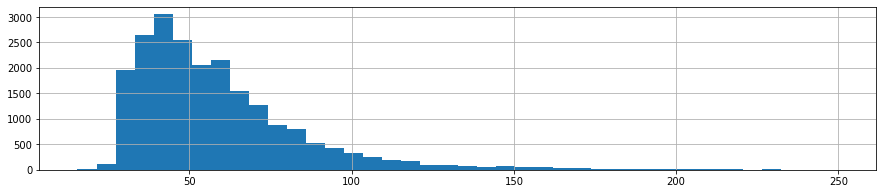

In [125]:
data['total_area'].hist(figsize = (15,3), bins=40);

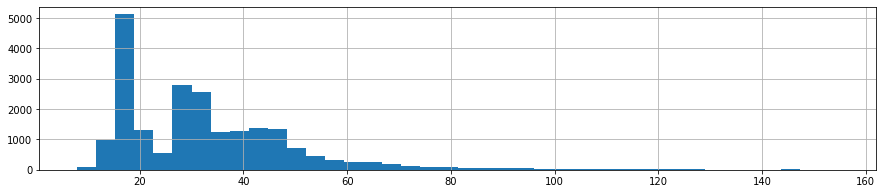

In [126]:
data['living_area'].hist(figsize = (15,3), bins=40);

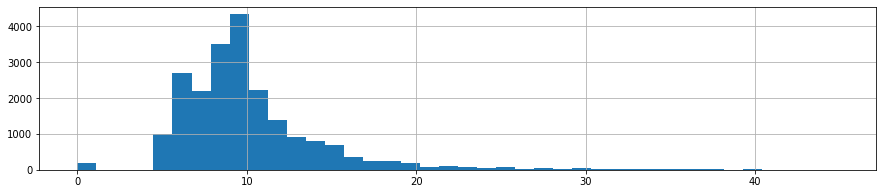

In [127]:
data['kitchen_area'].hist(figsize = (15,3), bins=40);

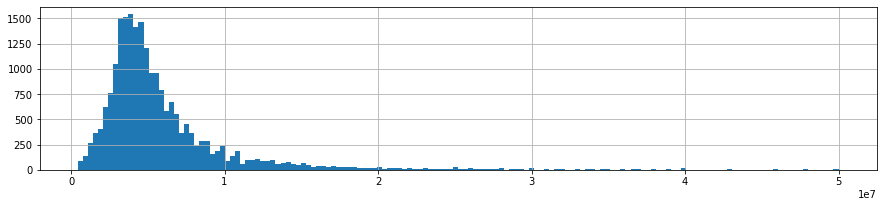

In [128]:
data['last_price'].hist(figsize = (15,3), bins=150);

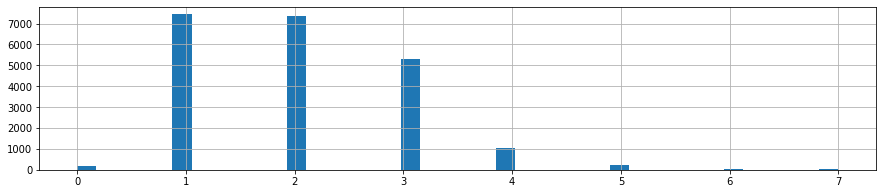

In [129]:
data['rooms'].hist(figsize = (15,3), bins=40);

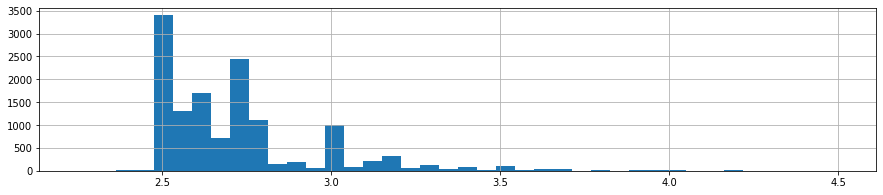

In [130]:
data['ceiling_height'].hist(figsize = (15,3), bins=40);

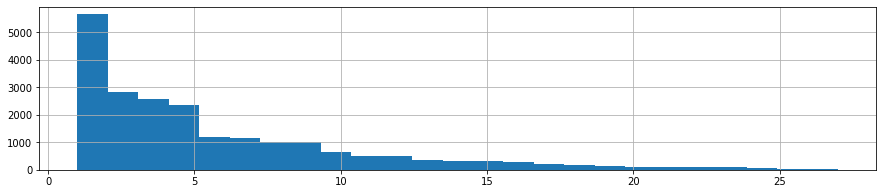

In [131]:
data['floor'].hist(figsize = (15,3), bins=25);

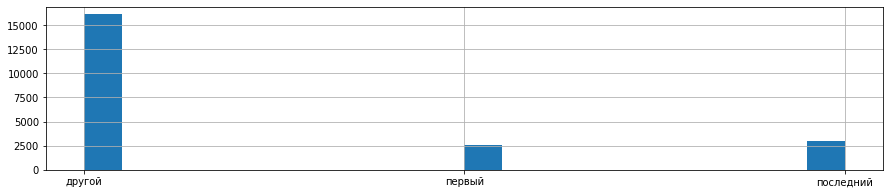

In [132]:
data['floor_type'].hist(figsize = (15,3), bins=20);

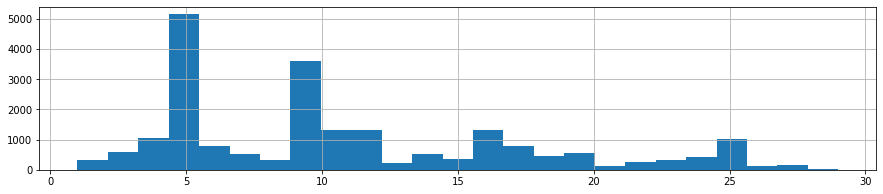

In [133]:
data['floors_total'].hist(figsize = (15,3), bins=25);

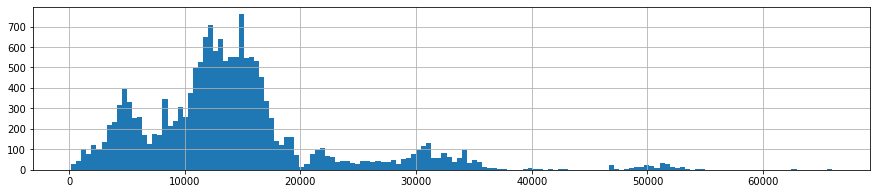

In [134]:
data['cityCenters_nearest'].hist(figsize = (15,3), bins=150);

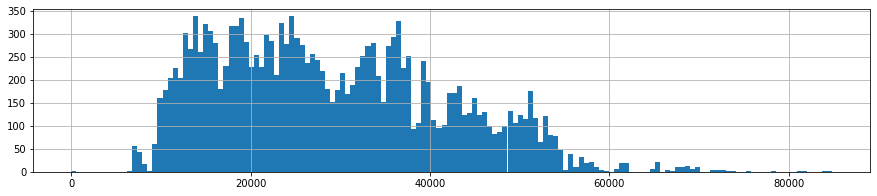

In [135]:
data['airports_nearest'].hist(figsize = (15,3), bins=150);

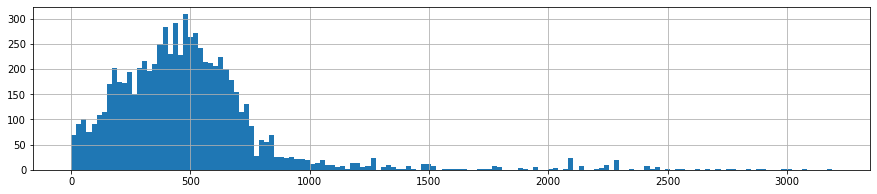

In [136]:
data['parks_nearest'].hist(figsize = (15,3), bins=150);

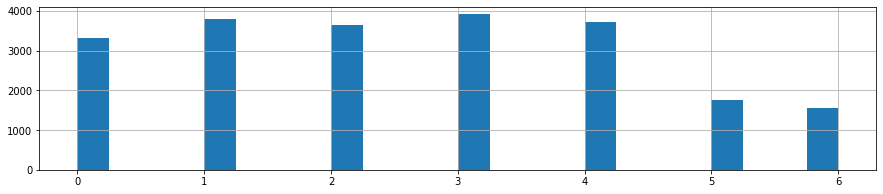

In [137]:
data['day_of_week_exp'].hist(figsize = (15,3), bins=24);

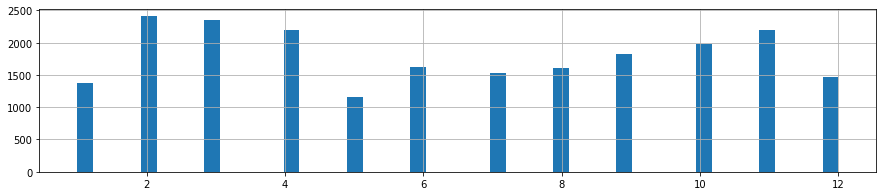

In [138]:
data['month_exposition'].hist(figsize = (15,3), bins=48);

<h4>Сроки и скорость продажи квартир</h4>

Начнем с простого. Как распределяются сроки продаж.

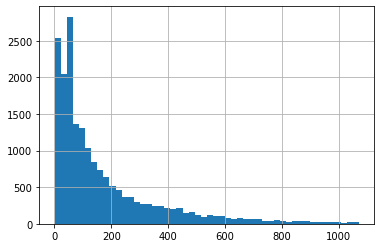

In [139]:
data['days_exposition'].hist(bins=50);

Распределение на гистограмме показывает, что квартиры продаются чаще всего квартиры продаются в момент начала вывешивания объявления. Пока мы не знаем какой период времени считать за самый "продаваемый".

In [140]:
data['days_exposition'].mean()

170.6111170383015

В среднем продажа квартир происходит 6 месяцев. Проверив медиану. 

In [141]:
data['days_exposition'].median()

94.0

Средний показатель превышает медиану аж в 2 раза. Происходит это потому что распределение значений сроков продаж имеет длинный хвост вправо, а данная статистика очень чувствительна к подобного рода высоким значениям.

Медиана сообщает, что половина 50% продаж совершается в течение 95 дней с момента вывески объявления.  
Т.е. можно в общем значении сказать, что если вы вывешиваете объявление о продаже, то ожидать продажи в первые 3 месяца можно с вероятностью 50%.

Интересно, каковы медианы в разрезе жилой площади? Возьмем за признак группировки - количество комнат. Чем больше комнат - тем больше площадь квартиры. Хотя это не всегда так, но в большинстве случаев такая логика должна работать, а значит не придется отдельно вводить категориальный признак.

In [142]:
#построим сводную по комнатам и посмотрим как распрделены медианные/средние показатели сроков продаж.
#total_area добавлено для уверенности, что площадь увеличивается в зависимости от rooms
data.pivot_table(index='rooms', values=['days_exposition', 'total_area'], aggfunc=['median', 'mean'])

median                       mean            
      days_exposition total_area days_exposition  total_area
rooms                                                       
0                45.0     26.165      112.809524   27.494670
1                81.0     37.000      154.105349   38.095026
2                90.0     53.500      163.704464   56.033559
3               114.0     73.000      191.863688   77.297865
4               152.0     98.000      230.651048  103.854674
5               164.5    140.000      261.315217  143.520677
6               256.0    168.300      314.853659  167.709677
7               150.0    175.000      194.133333  173.996154

Это уже интереснее. Сроки продаж увеличиваются с увеличением количества площади квартиры! Т.е. чем больше ваша квартира, тем дольше вы будете её продавать. +1 инсайд в копилку инсайдов.

<h4>Факторы больше всего влияющие на общую (полную) стоимость объекта</h4>

Возьмем срез данных для удобства с необходимыми столбцами для выполнения задачи обнаружения корреляций.

In [143]:
cost_factors = (data
    .loc[:,
        ['last_price',
         'total_area',
         'living_area',
         'kitchen_area',
         'rooms',
         'floor_type',
         'day_of_week_exp',
         'month_exposition',
         'year_exposition']
    ]
)

Начнем с простого. Построим матрицу диаграмм рассеяния.

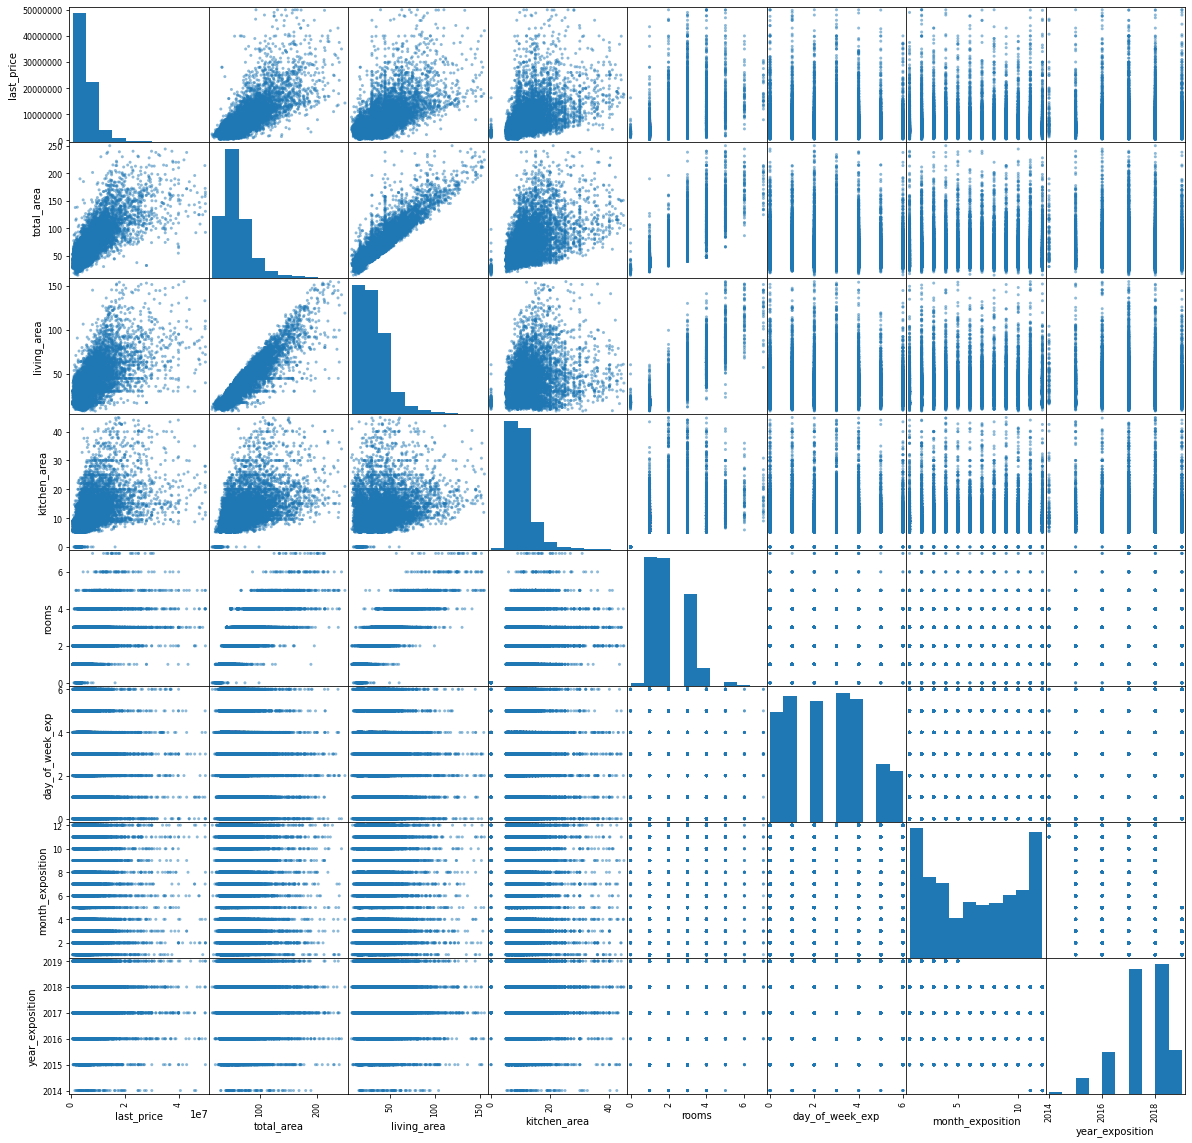

In [144]:
pd.plotting.scatter_matrix(cost_factors, figsize=(20,20));

Если определенные зависимости можно разглядеть, то только среди числовых переменных. Категориальные переменные в данном случае только вносят непонятность. Для удобства составим матрицу, исключив категории. Опытным путем подберем прозрачность точек из за высокой плотности.

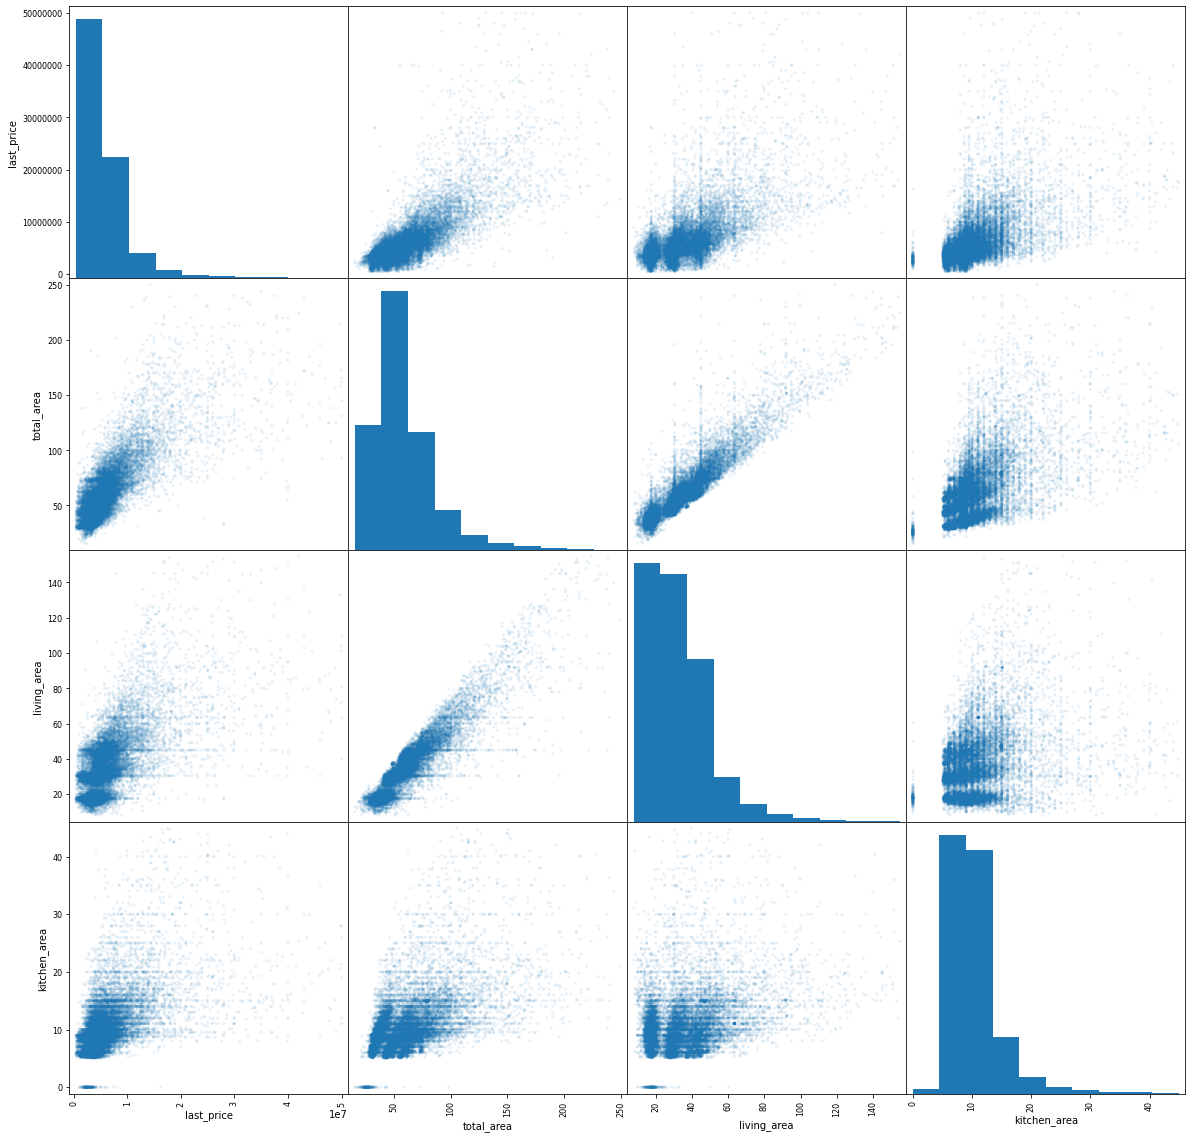

In [145]:
pd.plotting.scatter_matrix(cost_factors.loc[:, 'last_price':'kitchen_area'], figsize=(20,20), alpha=0.1);

Определенные положительный тренд взаимосвязи площади и стоимости прослеживается, но все графики имеют довольно высокое скопление точек ближе к началу шкал и сильное рассеяние к центру.  
Пожалуй, самый выраженный тренд выглядит в отношениях total_area к last_price. В меньшей степени living_area и kitchen_area.  
Рассмотрим в числовой выраженности степень корелляции и как доказательство наших догадок о взаимосвязи.

In [146]:
#матрица корелляций с исключенными категориальными признаками
cost_factors.loc[:, 'last_price':'kitchen_area'].corr()

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.771837,0.650916,0.558673
total_area,0.771837,1.000000,0.919785,0.557238
living_area,0.650916,0.919785,1.000000,0.335926
kitchen_area,0.558673,0.557238,0.335926,1.000000


Как и предполагалось: наиболее тесную связь оказывающее наибольшее влияние оказалась связь последней цены с общей площадью квартиры.

Примечание: в ходе попыток построить корелляционную связь и графики рассеяни в зависимости от категориальных переменных выявилось, что такими инструментами как scatter и corr() связь не выявить в виду именно их категориальности. 

Попробуем вычислить медианное значение стоимости по каждой группе категориальных признаков ниже и построить столбчатую диаграмму:
1. 'rooms'
2. 'floor_type'
3. 'day_of_week_exp'
4. 'month_exposition'
5. 'year_exposition'

Рассмотрим зависимость last_price от 'rooms'

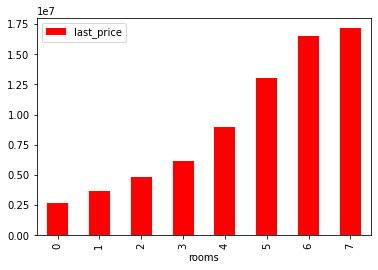

In [147]:
#распределение медианной цены по количеству комнат
#строим сводную
(cost_factors.pivot_table(
    index='rooms', values='last_price', aggfunc='median')
#обновляем индексы, чтобы использовать rooms при построении
    .reset_index()
#строим столбчатую диаграмму
    .plot(kind='bar', x='rooms', y='last_price', color='red')
);

Выраженные тренд на увеличение стоимости с ростом количества комнат.

Рассмотрим зависимость last_price от 'floor_type'

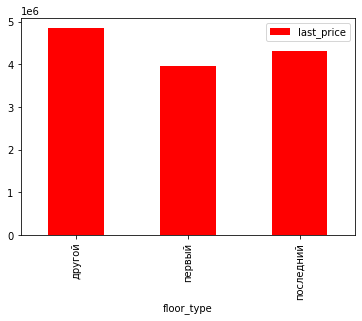

In [148]:
#распределение медианной цены по количеству комнат
#строим сводную
(cost_factors.pivot_table(
    index='floor_type', values='last_price', aggfunc='median')
#обновляем индексы, чтобы использовать floor_type при построении
    .reset_index()
#строим столбчатую диаграмму
    .plot(kind='bar', x='floor_type', y='last_price', color='red')
);

Квартиры на первых этажах стоят дешевле остальных, последний тоже не добавляют квартире большой стоимости. А вот всё что 'между' является наиболее выгодным для продажи вариантом.

Рассмотрим зависимость last_price от 'day_of_week_exp'

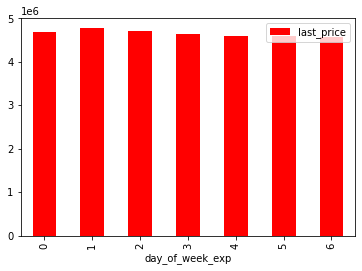

In [149]:
#распределение медианной цены по количеству комнат
#строим сводную
(cost_factors.pivot_table(
    index='day_of_week_exp', values='last_price', aggfunc='median')
#обновляем индексы, чтобы использовать day_of_week_exp при построении
    .reset_index()
#строим столбчатую диаграмму
    .plot(kind='bar', x='day_of_week_exp', y='last_price', color='red')
);

Значения столбцов примерно одинаковы. Можно сказать, что связь в том, что какой то день выгоднее для продажи не прослеживается.

Рассмотрим зависимость last_price от 'month_exposition'

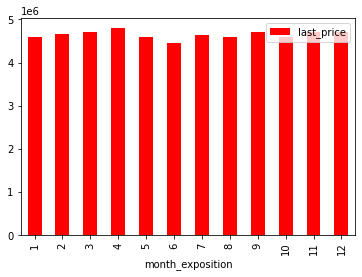

In [150]:
#распределение медианной цены по количеству комнат
#строим сводную
(cost_factors.pivot_table(
    index='month_exposition', values='last_price', aggfunc='median')
#обновляем индексы, чтобы использовать month_exposition при построении
    .reset_index()
#строим столбчатую диаграмму
    .plot(kind='bar', x='month_exposition', y='last_price', color='red')
);

Небольшую просадку можно увидеть в период с мая по сентябрь. В остальном значительной разницы нет.

Рассмотрим зависимость last_price от 'year_exposition'

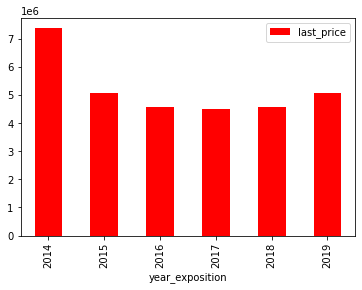

In [151]:
#распределение медианной цены по количеству комнат
#строим сводную
(cost_factors.pivot_table(
    index='year_exposition', values='last_price', aggfunc='median')
#обновляем индексы, чтобы использовать year_exposition при построении
    .reset_index()
#строим столбчатую диаграмму
    .plot(kind='bar', x='year_exposition', y='last_price', color='red')
);

Снижение стоимости квартир почти в 2 раза, начиная с 2015 года. B ровное распределение цен с 2016. Что же произошло? Давайте проверим количество объявлений по годам.

In [152]:
data['year_exposition'].value_counts()

2018    7874
2017    7591
2019    2661
2016    2528
2015     931
2014      90
Name: year_exposition, dtype: int64

Всего 136 объявлений в 2014 году против 8456 в 2018. Такую выборку 2014 года можно не считать репрезентативной в виду её небольшого количества объявленияй.  
С развитием площадки и увеличением количества объявлений медианная стоимость квартир колебалась незначительно. Закон больших чисел в действии.  
Тренд не прослеживается.

<b>Вывод по пункту 4.2</b>  
  
Среди числовых факторов мы обнаружили, что наибольшее влияение на конечную стоимость квартиры оказывает общее количество площади квартиры. Коэффициент корелляции составил 0.76.  
Среди категориальных переменных есть связь с положением квартиры на этажах: большую ценность она будет иметь на этажах типа "другой", т.е. не первый и не последний.  
Так же влиет на стоимость количество комнат, что неудивительно, поскольку количество комнат тесно связано с общей площадью.  Небольшое снижение стоимости замечено в период поздней весны и лета, вероятно это сезонность спроса, но без зачительных колебаний.

<h4>Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.</h4>

In [153]:
#воспользуемся в сводной новыми именами населенных пунктов
top_ten_cities = data.pivot_table(index='new_locality_name',values='sqr_mtr_cost',aggfunc=['count','mean'])

#переименуем колонки
top_ten_cities.columns = ['ad_count', 'mean_sqr_mtr_cost']

#отсортируем по убыванию пункты по числу объявлений
top_ten_cities = top_ten_cities.sort_values(by='ad_count', ascending=False)

#оставим первые 10 записей
top_ten_cities = top_ten_cities.head(10)

top_ten_cities.style.format("{:,.2f}")

,ad_count,mean_sqr_mtr_cost
new_locality_name,,
Санкт-Петербург,"14,475.00","111,705.64"
Мурино,523.00,"85,333.60"
Кудрово,430.00,"94,688.79"
Шушары,421.00,"78,314.00"
Всеволожск,374.00,"68,813.63"
Пушкин,321.00,"103,846.65"
Парголово,319.00,"89,821.14"
Колпино,317.00,"75,365.91"
Гатчина,271.00,"69,241.21"


Построим диаграмму для удобного восприятия.

<AxesSubplot:xlabel='new_locality_name'>

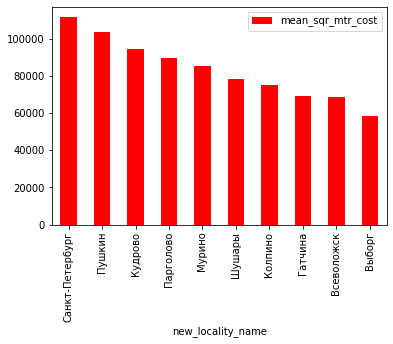

In [154]:
#обновим индексы, чтобы мы могли построить диаграмму
(top_ten_cities.reset_index()
#отсортируем столбец средней стоимости квадратного метра
    .sort_values(by='mean_sqr_mtr_cost', ascending=False)
#построим диаграмму
    .plot(kind='bar', x='new_locality_name', y='mean_sqr_mtr_cost', color='red')
)

<b>Вывод по пункту 4.3</b>  
Теперь мы видим, что самые дорогие квадратные метры расположены у Санкт-Петербурга и лидирует непосредственно сам город.

Интересно, как влияет удаленность от СПб на стоимость квартир? Рассмотрим в следующем пункте.

<h4>Средняя цена километра до центра</h4>

In [155]:
#воспользуемся в сводной новыми именами населенных пунктов
sqr_km_cost = (data[data['locality_name'] == 'Санкт-Петербург']
    .pivot_table(index='cityCenters_nearest_km',values='sqr_mtr_cost')
)
#переименуем колонки
sqr_km_cost.columns = ['mean_km_cost']

#отсортируем стоимость по увеличению расстояния
sqr_km_cost = sqr_km_cost.reset_index().sort_values(by='cityCenters_nearest_km', ascending=False)

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='mean_km_cost'>

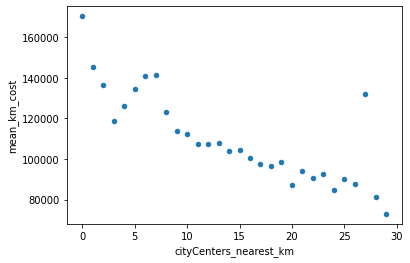

In [156]:
#построим столбчатую диаграмму
sqr_km_cost.plot(kind='scatter', x='cityCenters_nearest_km', y='mean_km_cost')

Наблюдается отчетливое снижение средней стоимости квадратного метра по мере удаленности от центра Санкт-Петербурга. При этом снижение стоимости замедляется c удалением от центра.

<b>Вывод по пункту 4.4</b>
  
Стоимость квартиры зависит от степени удаленности от центра.

### Общий вывод

Мы провели небольшое исследование факторов, влияющих на стоимость квартиры.
Выяснилось что сроки продаж квартиры отличаются: проще продать квартиры с небольшой общей площадью, но сроки продаж растут вместе с увеличением квадратных метров (соответственно и стомости).

In [157]:
data.pivot_table(index='rooms', values=['days_exposition', 'total_area'], aggfunc='median').reset_index()

,rooms,days_exposition,total_area
0,0,45.0,26.165
1,1,81.0,37.000
2,2,90.0,53.500
3,3,114.0,73.000
4,4,152.0,98.000
5,5,164.5,140.000
6,6,256.0,168.300
7,7,150.0,175.000


На конечную стоимость квартиры набиольшее влияние оказывает общие квадратные метры.

In [158]:
cost_factors.loc[:, 'last_price':'kitchen_area'].corr().style.format("{:.2f}")

,last_price,total_area,living_area,kitchen_area
last_price,1.00,0.77,0.65,0.56
total_area,0.77,1.00,0.92,0.56
living_area,0.65,0.92,1.00,0.34
kitchen_area,0.56,0.56,0.34,1.00


Продавать квартиры выгоднее вне летнего периода.

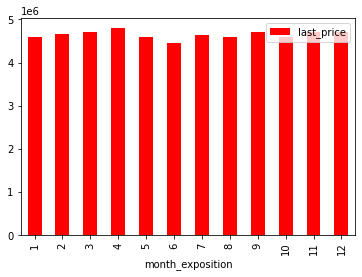

In [159]:
(cost_factors.pivot_table(
    index='month_exposition', values='last_price', aggfunc='median')
    .reset_index()
    .plot(kind='bar', x='month_exposition', y='last_price', color='red')
);

Дороже всего квартиры стоят в центре Санкт-Петербурга и дешевеют по мере удаленности от него.